# Laboratorium nr 4
Autor: Dawid Klyta

Nr Albumu: 136564
## Zadanie nr 1:

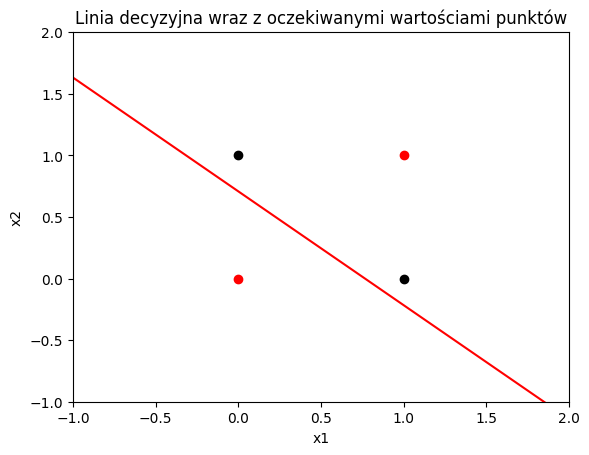

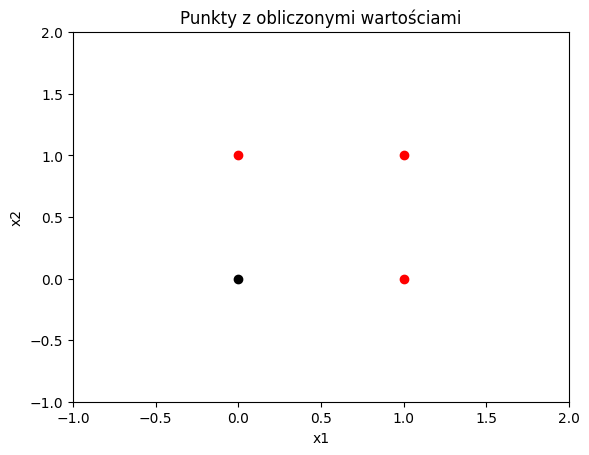

In [86]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
D = np.array([1,
              0,
              0,
              1])
W = np.random.random(3)

#Kod z laboratorium nr 3:
def liczNeuronem(_x, _w):
  result = np.zeros(len(_x))
  for j in range(len(_x)):
    _xx = _x[j]
    s = 0
    for i in range(len(_w)):
      if i == 0:
        s+= _w[0] * (-1)
      else:
        s += _w[i] * _xx[i-1]
    if s >= 0:
      result[j] = 1
    else:
      result[j] = 0
  return result

def uczNeuron(_x, _w, _d, teta, times=10000):
  newW = np.zeros(len(_w))
  for i in range(len(_w)):
    newW[i] = _w[i]
  for g in range(times):

    for j in range(len(_x)):
      _xx = _x[j]
      s = 0
      for i in range(len(_w)):
        if i == 0:
          s = newW[0] * (-1)
        else:
          s += newW[i] * _xx[i-1]
      if s >= 0:
        s = 1
      else:
        s = 0
      delta = _d[j]-s
      for k in range(len(newW)):
        if k == 0:
          newW[0] = newW[0] +teta*delta*(-1)
        else:
          newW[k] = newW[k] +teta*delta*_xx[k-1]
  return newW
#-----------
def showAxis2dLineAndExpectedPoints(_x,_w1,_d, title=""):
  _xfy = np.array([-1,0,1,2])
  _y1 = -(_w1[1]/_w1[2]) * _xfy + (_w1[0]/_w1[2])
  plt.plot(_xfy,_y1,"r-")
  for i in range(len(_x)):
    if _d[i] == 0:
      plt.plot(_x[i,0],_x[i,1], 'ko')
    else:
      plt.plot(_x[i,0],_x[i,1], 'ro')
  plt.axis([-1.0,2.0,-1.0,2.0])
  plt.xlabel("x1")
  plt.ylabel("x2")
  if len(title)>0:
    plt.title(title)
  plt.show();
def ShowAxis2dCaclPoints(_x,_r, title=""):
  for i in range(len(_x)):
    if _r[i] == 0:
      plt.plot(_x[i,0],_x[i,1], 'ko')
    else:
      plt.plot(_x[i,0],_x[i,1], 'ro')
  plt.axis([-1.0,2.0,-1.0,2.0])
  plt.xlabel("x1")
  plt.ylabel("x2")
  if len(title)>0:
    plt.title(title)
  plt.show();

W2 = uczNeuron(X,W,D,0.1,100)
showAxis2dLineAndExpectedPoints(X,W2,D, "Linia decyzyjna wraz z oczekiwanymi wartościami punktów")
R = liczNeuronem(X,W2)
ShowAxis2dCaclPoints(X,R,"Punkty z obliczonymi wartościami")



Jak można zobaczyć po stworzonych przeze mnie wykresach. Perceptron nauczył się poprawnie rozpoznawać tylko jeden z dwóch punktów ze zbioru jedynek. Spowodowane jest to tym, iż pojedyńczy perceptron potrafi jedynie oddzielić **pojedyńczą linią** zbiór jedynek od zbioru zer a w tym przypadku jest to niemożliwe. Potrzeba minimum dwóch linii aby oddzielić te dwa zbiory od siebie.
## Zadanie nr 2:

[-1  0  1  2]


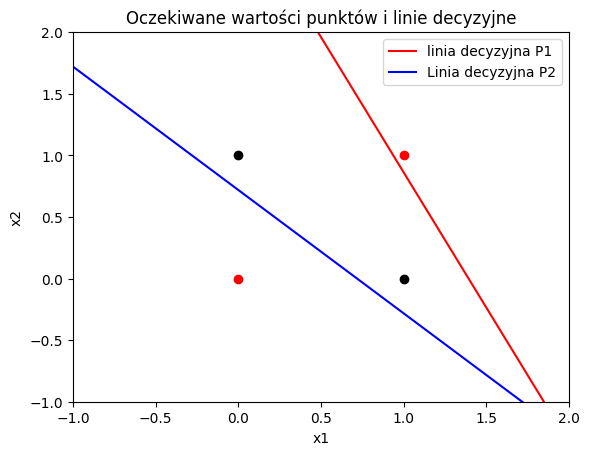

In [87]:


def showAxis2dLinesAndExpectedPoints(_x,_w1,_w2,_d, title=""):
  _xfy = np.array([-1,0,1,2])
  print(_xfy)
  _y1 = -(_w1[1]/_w1[2]) * _xfy + (_w1[0]/_w1[2])
  _y2 = -(_w2[1]/_w2[2]) * _xfy + (_w2[0]/_w2[2])
  plt.plot(_xfy, _y1, 'r-', label="linia decyzyjna P1")
  plt.plot(_xfy, _y2, 'b-',label="Linia decyzyjna P2")
  for i in range(len(_x)):
    if _d[i] == 0:
      plt.plot(_x[i,0],_x[i,1], 'ko')
    else:
      plt.plot(_x[i,0],_x[i,1], 'ro')
  plt.axis([-1.0,2.0,-1.0,2.0])
  plt.xlabel("x1")
  plt.ylabel("x2")
  plt.legend()
  if len(title)>0:
    plt.title(title)
  plt.show();

#Perceptron P1:
D1 = np.array([0,
               0,
               0,
               1])
W1 = np.random.random(3)
W12 = uczNeuron(X,W1,D1,0.1,100)

#Perceptron P2:
D2 = np.array([1,
               0,
               0,
               0])
W2 = np.random.random(3)
W22 = uczNeuron(X,W2,D2,0.1,100)
#Wyniki uczenia:
showAxis2dLinesAndExpectedPoints(X,W12,W22,D,"Oczekiwane wartości punktów i linie decyzyjne")

Perceptrony poprawnie oddzielają dwa zbiory. Wystarczy już tylko zaimplementować trzeci perceptron P3, który na podstawie dwóch poprzednich będzie zwracać odpowiednie wartości.
##Zadanie numer 3:

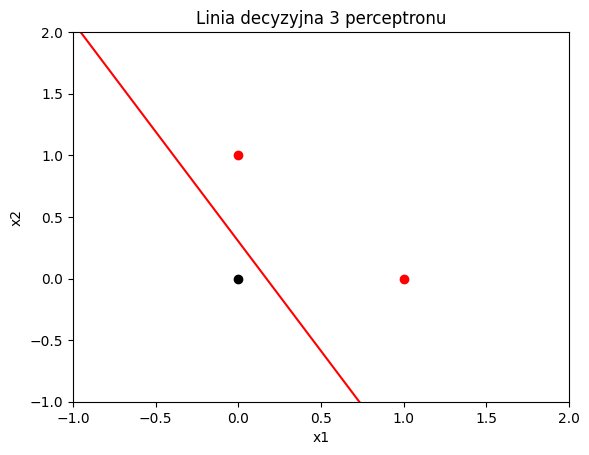

In [88]:
#Perceptron P3:
Y = np.array([[0,0],
             [0,1],
             [1,0]])
D3 = np.array([0,1,1])
W3 = np.random.random(3)

W32 = uczNeuron(Y,W3,D3,0.1,100)
showAxis2dLineAndExpectedPoints(Y,W32,D3,"Linia decyzyjna 3 perceptronu")

##Zadanie nr 4:

In [100]:
Y1 = liczNeuronem(X,W12)
Y2 = liczNeuronem(X,W22)
Y =np.zeros([len(Y1),2])
for i in range(len(Y1)):
  Y[i,0] = Y1[i]
  Y[i,1] = Y2[i]
Y3 = liczNeuronem(Y,W32)
print("Dla X:\n",X,"\nWyniki to:\n",Y3)

Dla X:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]] 
Wyniki to:
 [1. 0. 0. 1.]
